# 💎 Scenario 3: Brand Loyalty Integration (4-Input Master)
### *Behavioral Economics in Pricing*

**The Concept:** Traditional economics says "If competitor is cheaper, you must lower price." **Behavioral Economics** says "If customers love you, price doesn't matter."

In this final scenario, we add the **"Moat"** factor. A strong brand can ignore competitor price cuts, while a weak brand must react instantly.

**The 4 Inputs:**
1.  **Demand Strength:** ($0 - 100$).
2.  **Inventory Level:** ($0 - 1000$).
3.  **Competitor Gap:** ($-50\%$ to $+50\%$).
4.  **Customer Loyalty:** The emotional connection ($0 - 10$).
    * *Low:* Customers leave for a $1 discount.
    * *High:* Customers wait in line overnight (The Apple Effect).

**The Output:**
* **Price Adjustment:** Optimized for long-term brand value ($-25\%$ to $+25\%$).

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00


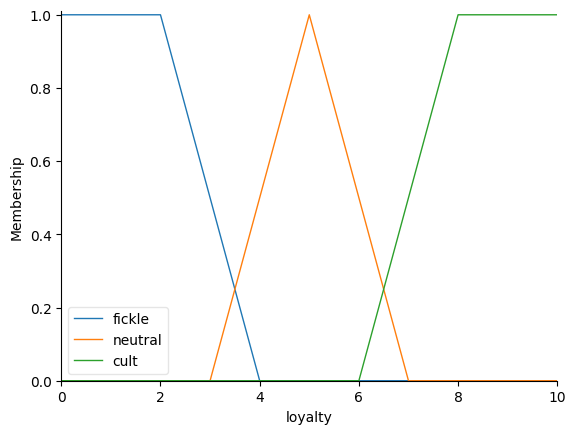

In [1]:
!pip install scikit-fuzzy -q
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Define Universes
demand = ctrl.Antecedent(np.arange(0, 101, 1), 'demand')
inventory = ctrl.Antecedent(np.arange(0, 1001, 1), 'inventory')
comp_gap = ctrl.Antecedent(np.arange(-50, 51, 1), 'comp_gap')
loyalty = ctrl.Antecedent(np.arange(0, 11, 1), 'loyalty') # 0-10 Scale
price_chg = ctrl.Consequent(np.arange(-25, 26, 1), 'price_chg')

# 2. Membership Functions
# Previous definitions (Recycled for consistency)
demand['low'] = fuzz.trapmf(demand.universe, [0, 0, 30, 50])
demand['medium'] = fuzz.trimf(demand.universe, [40, 60, 80])
demand['high'] = fuzz.trapmf(demand.universe, [70, 90, 100, 100])

inventory['scarce'] = fuzz.trapmf(inventory.universe, [0, 0, 100, 300])
inventory['healthy'] = fuzz.trimf(inventory.universe, [200, 500, 800])
inventory['overstock'] = fuzz.trapmf(inventory.universe, [700, 900, 1000, 1000])

comp_gap['cheaper'] = fuzz.trapmf(comp_gap.universe, [-50, -50, -20, -5])
comp_gap['similar'] = fuzz.trimf(comp_gap.universe, [-10, 0, 10])
comp_gap['expensive'] = fuzz.trapmf(comp_gap.universe, [5, 20, 50, 50])

# The New Variable: Loyalty
loyalty['fickle'] = fuzz.trapmf(loyalty.universe, [0, 0, 2, 4]) # Sadakatsiz
loyalty['neutral'] = fuzz.trimf(loyalty.universe, [3, 5, 7])
loyalty['cult'] = fuzz.trapmf(loyalty.universe, [6, 8, 10, 10]) # Fanatik

# Output
price_chg['slash'] = fuzz.trapmf(price_chg.universe, [-25, -25, -15, -10])
price_chg['discount'] = fuzz.trimf(price_chg.universe, [-12, -6, 0])
price_chg['maintain'] = fuzz.trimf(price_chg.universe, [-2, 0, 2])
price_chg['premium'] = fuzz.trimf(price_chg.universe, [0, 6, 12])
price_chg['luxury'] = fuzz.trapmf(price_chg.universe, [10, 18, 25, 25])

# Visualize Loyalty
loyalty.view()

### 🧠 The Logic of Resilience
Here we define rules that prioritize **Brand Equity** over short-term wars.

**Strategic Rules:**
1.  **The Apple Rule:** If Loyalty is `Cult` AND Competitor is `Cheaper`, we do **NOT** drop prices. We `Maintain`.
2.  **The Commodity Trap:** If Loyalty is `Fickle` AND Competitor is `Cheaper`, we must `Slash` prices immediately to keep volume.
3.  **The Luxury Tax:** If Demand is `High` AND Loyalty is `Cult`, we apply `Luxury` pricing (+20%), regardless of inventory.

| Loyalty | Competitor | Strategy | Action |
| :--- | :--- | :--- | :--- |
| **Cult** | Cheaper | Ignore Them | **Maintain** |
| **Fickle** | Cheaper | Fight Them | **Slash** |
| **Cult** | Expensive | Dominate | **Luxury** |
| **Neutral**| Similar | Follow Market| **Maintain** |

In [2]:
# 3. Master Rule Base
rules = [
    # --- Cult Loyalty (The Shield) ---
    ctrl.Rule(loyalty['cult'] & comp_gap['cheaper'], price_chg['maintain']), # Ignore price war
    ctrl.Rule(loyalty['cult'] & demand['high'], price_chg['luxury']), # Charge for brand
    ctrl.Rule(loyalty['cult'] & inventory['overstock'], price_chg['discount']), # Gentle clearance

    # --- Fickle Loyalty (The Vulnerability) ---
    ctrl.Rule(loyalty['fickle'] & comp_gap['cheaper'], price_chg['slash']), # Must drop price
    ctrl.Rule(loyalty['fickle'] & comp_gap['expensive'], price_chg['maintain']), # Can't raise price

    # --- Standard Operations ---
    ctrl.Rule(loyalty['neutral'] & inventory['healthy'] & comp_gap['similar'], price_chg['maintain']),
    ctrl.Rule(loyalty['neutral'] & demand['low'], price_chg['discount']),
    ctrl.Rule(inventory['scarce'], price_chg['premium']) # Scarcity is universal
]

# 4. Build Engine
master_ctrl = ctrl.ControlSystem(rules)
master_engine = ctrl.ControlSystemSimulation(master_ctrl)

# Test Scenario: "The Loyal Fanbase"
# Competitor is 20% cheaper (-20), but our Loyalty is 9/10 (Cult)
master_engine.input['demand'] = 60
master_engine.input['inventory'] = 500
master_engine.input['comp_gap'] = -20
master_engine.input['loyalty'] = 9

try:
    master_engine.compute()
    print(f"Brand-Adjusted Price Move: {master_engine.output['price_chg']:.2f}%")
except:
    print("Edge case detected.")

Brand-Adjusted Price Move: -0.00%


### 📊 Visualizing the "Moat"
To see the power of loyalty, we perform a **4D Slice**:
* We fix **Inventory** at `Healthy` (500).
* We fix **Loyalty** at `Cult` (9/10).
* We compare **Demand** vs **Competitor Gap**.

**Prediction:** Normally, if a competitor is cheaper (negative gap), the graph dips into the "Slash" zone. But with `Cult` loyalty, the surface should stay flat (Resilience).

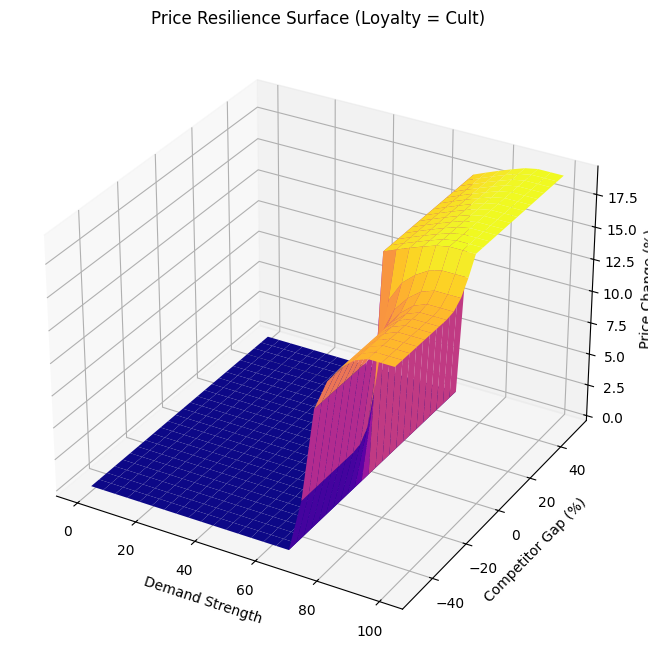

In [4]:
import matplotlib.pyplot as plt

# Grid
x_dem = np.linspace(0, 100, 25)
y_gap = np.linspace(-50, 50, 25)
x, y = np.meshgrid(x_dem, y_gap)
z = np.zeros_like(x)

# Simulation Loop (Sliced at High Loyalty)
for i in range(25):
    for j in range(25):
        master_engine.input['demand'] = x[i, j]
        master_engine.input['comp_gap'] = y[i, j]
        master_engine.input['inventory'] = 500 # Fixed
        master_engine.input['loyalty'] = 9     # Fixed: High Loyalty

        try:
            master_engine.compute()
            z[i, j] = master_engine.output['price_chg']
        except:
            z[i, j] = 0 # Safety net

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='plasma', edgecolor='none') # Plasma for "High Energy" brand

ax.set_title('Price Resilience Surface (Loyalty = Cult)')
ax.set_xlabel('Demand Strength')
ax.set_ylabel('Competitor Gap (%)')
ax.set_zlabel('Price Change (%)')
plt.show()

### 🕹️ Bonus: Interactive Moat Analysis
Rotate this map to see the "Shield Effect."
* Notice the **Negative Competitor Gap** area (where they are cheaper).
* Unlike the previous scenario, the surface does **not** collapse into deep discounts.
* This visualizes the financial value of **Brand Equity**.

In [5]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(
    z=z, x=x, y=y,
    colorscale='Plasma',
    opacity=0.9
)])

fig.update_layout(
    title='Interactive Brand Resilience Map (Loyalty=High)',
    scene=dict(
        xaxis_title='Demand',
        yaxis_title='Competitor Gap (%)',
        zaxis_title='Price Move (%)'
    ),
    width=800, height=700,
    margin=dict(l=40, r=40, b=40, t=80)
)

fig.show()

### 🎯 Result: The Pricing Optimization Suite
This project successfully modeled the hierarchy of pricing power across three levels of complexity.

1.  **Supply Chain Level:** Balancing Scarcity vs. Overstock.
2.  **Market Level:** Reacting to Competitor Pressure.
3.  **Brand Level:** Quantifying the "Moat" that protects margins from price wars.

**Key Takeaway:** The 4-Input Fuzzy Model demonstrates that **Loyalty is a tangible asset**. It mathematically justifies maintaining premium prices even when undercutting occurs, preventing unnecessary revenue loss due to algorithmic panic.